# Introduction to Data Science Course Final Project

> by Kfir Goldfarb

<a href="https://github.com/kggold4"><img src="images/github.png" width="25px" height="25px" align="left"></a>
<a href="https://www.linkedin.com/in/kfir-goldfarb/"><img src="images/in.png"  width="25px" height="25px" align="left"></a>
<a href="mailto:kfir.goldfarb@msmail.ariel.ac.il"><img src="images/email.png" width="25px" height="25px" align="left"></a>
<a href="https://www.youtube.com/channel/UCypEWlruyG_I5A48GqB5c6g"><img src="images/youtube.png" width="25px" height="25px" align="left"></a>

<br>

# Jupyter Notebook Number 3
<i>Machine Learning</i>
<br>

<img src="images/ml2images.jpg" width="90%" height="auto" align="left">

# <i>Part 1 - Classification:</i>

In [1]:
# libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

the dataset I'm using for the classification problem is from:
https://www.kaggle.com/spscientist/students-performance-in-exams

### this dataset deals with different grades of students according to 3 topics:

1. math score
2. reading score
3. writing score

### this information we have about a student is:

1. gender
2. race/ethnicity
3. parental level of education
4. lunch
5. test preparation course

# The goal of my machine learning model:

After the data preparation, I want to take for each student the three scores: math score, reading score and writing score and merge them to one feature by the mean of the three, this feature will called average.
After that process we have one feature called average and have a number value between 0 and 100, i want to classified the scores to two main classes:

1. 1, if x >= 60 ('pass')
2. 0, else ('fail')

Now, the goal of the model by a given a data of a student is to predict what is the status of the student, if the studet is fail ('0') or pass ('1') in the tests score.

In [2]:
# import data:
students = pd.read_csv('data/students.csv')

## <i>Learning about the data:</i>

In [3]:
# first five students:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## <i>Dataset Features:</i>
1. gender - the sex of the student (male or female)
2. race/ethnicity - the race/ethnicity of the student (groups) - (details on the groups below)
3. parental level of education - the parental level of education of the student (the parents of his) - (details on the groups below)
4. lunch - if the student ate a lunch before the exams
5. test preparation course - if the student take a test preparation course
6. math score
7. reading score
8. writing score

In [4]:
# checking if the data contains null data objects:
# and see data types
students.info()

# as we can see the data is clean of null data objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# another check for finding null objects
students.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
# seeing the students scores widely
students.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
# adding the average score feature for each student with the average of math, reading and writing score
# the assign ,method is to change every average value in average target for each row
students = students.assign(average= lambda x: ((x['math score'] + x['reading score'] + x['writing score']) / 3.0))
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


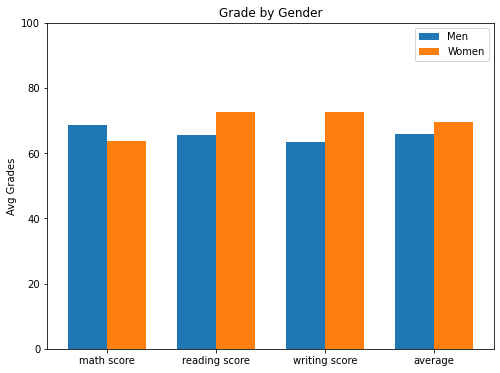

In [8]:
# ploting a bar plot with grades by genders (means):

# male will get a numpy array with the means of scores by male gender
male = np.array(students.groupby('gender').mean())[1]

# male will get a numpy array with the means of scores by female gender
female = np.array(students.groupby('gender').mean())[0]

# change the figure size of the bar plot
plt.figure(figsize=(8,6))

width = 0.36
ind = np.arange(4)

# ploting man scores means
plt.bar(ind, male, width, label='Men')

# ploting women scores means
plt.bar(ind + width, female, width, label='Women')

# limit the axis from 0 to 100
plt.ylim(0,100)

# y label
plt.ylabel('Avg Grades')

# plot title
plt.title('Grade by Gender')

# x ticks
plt.xticks(ind + width / 2 ,('math score','reading score','writing score','average'))

plt.legend()

plt.show()

In [9]:
# define a function that plot with a pie
def print_pie(values, lables):
    values = list(values)
    
    # get a objcet pie from matplotlib and a figure
    fig1, ax1 = plt.subplots()

    # set the size of the figure
    fig1.set_figheight(7)
    fig1.set_figwidth(7)

    # plot the pie
    # x - the parental level of education data
    # autopct - show the percentages at only one decimal point
    # shadow - show the shadow of the pie
    # startangle - rotate the pie in 90 degrees
    ax1.pie(values, labels=lables, autopct='%1.1f%%', shadow=True, startangle=90)

    # equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')

    plt.show()

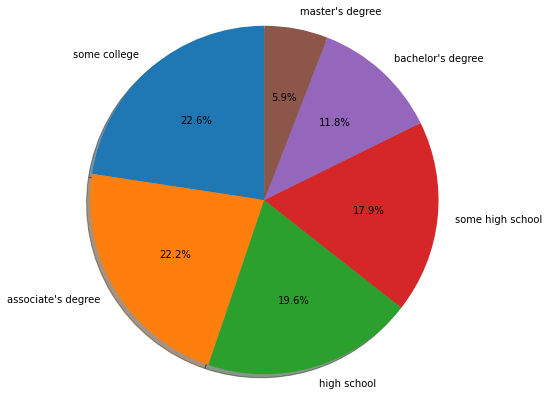

In [10]:
# showing differents in parental level of education of the students in the dataset in a pie of matplotlib

# get all the counts of the values in parental level of education feature
values = students['parental level of education'].value_counts()

# write all the type of values in parental level of education feature
parents_education = ['some college', 'associate\'s degree', 'high school',
                     'some high school', 'bachelor\'s degree', 'master\'s degree']

print_pie(values, parents_education)

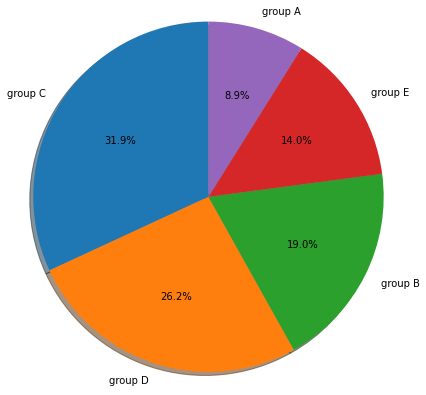

In [11]:
# showing differents in parental level of education of the students in the dataset in a pie of matplotlib

# get all the counts of the values in parental level of education feature
values = list(students['race/ethnicity'].value_counts())

# write all the type of values in parental level of education feature
ethnicity = ['group C', 'group D', 'group B', 'group E', 'group A']

print_pie(values, ethnicity)

## <i>Preparing the data:</i>

In [12]:
# for preparing all the binary values of text (string objects) in the data set:
# I used the LabelEncoder from sklearn.preprocessing library,
# that helping me to convert all the binary values of texetual data to a numbers
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

# preparing the 'gender' feature to binary numbers (0 = female, 1 = male)
students['gender'] = lc.fit_transform(students['gender'])

# preparing the 'lunch' feature to binary numbers (0 = free/reduced	, 1 = standard)
students['lunch'] = lc.fit_transform(students['lunch'])

# preparing the 'lunch' feature to binary numbers (0 = completed, 1 = none)
students['test preparation course'] = lc.fit_transform(students['test preparation course'])

# showing results
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,0,group B,bachelor's degree,1,1,72,72,74,72.666667
1,0,group C,some college,1,0,69,90,88,82.333333
2,0,group B,master's degree,1,1,90,95,93,92.666667
3,1,group A,associate's degree,0,1,47,57,44,49.333333
4,1,group C,some college,1,1,76,78,75,76.333333


In [13]:
# create dummies varables for 'race/ethnicity' feature:
students = pd.get_dummies(students, columns=['race/ethnicity'])

In [14]:
# create dummies varables for 'parental level of education' feature:
students = pd.get_dummies(students, columns=['parental level of education'])

In [15]:
# droping the math score, reading score and writing score features
students.drop('math score', inplace=True, axis = 1)
students.drop('reading score', inplace=True, axis = 1)
students.drop('writing score', inplace=True, axis = 1)

In [16]:
# classified the average score feature as: if x >= 60 - 1 ('pass'), else - 0 ('fail')
students['average'] = students['average'].apply(lambda x: 1 if x >= 60 else 0)
students.head(10)

,gender,lunch,test preparation course,average,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0
1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0
3,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0
5,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0
6,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0
7,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
8,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
9,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0


In [17]:
# create dummies varables for 'parental level of education' feature:
# students = pd.get_dummies(students, columns=['average'])
# students.head()

### Separate data to training and testing sets

In [18]:
feature_cols = ['gender','lunch','test preparation course','race/ethnicity_group A','race/ethnicity_group B',
                'race/ethnicity_group C', 'race/ethnicity_group D', 'race/ethnicity_group E',
                'parental level of education_associate\'s degree', 'parental level of education_bachelor\'s degree',
                'parental level of education_high school', 'parental level of education_master\'s degree',
                'parental level of education_some college', 'parental level of education_some high school']
X = students[feature_cols]
y = students['average']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

#### Print Accuracy function:

In [19]:
# function that print the accuracy
def print_accuracy(clf, X_train, X_test, y_train, y_test):
    # fit the train data to the model
    clf.fit(X_train, y_train)

    # get the pridictions of X_test
    pridictions = clf.predict(X_test)

    # get the accuracy of the model
    accuracy = clf.score(X_test, y_test)

    # print the accuracy
    print('accuracy of the model is: {} %'.format("%.2f" % (accuracy * 100)))

### Using KNeighborsClassifier model
#### Accuracy:

In [20]:
# get the classifier (found that 5 neighbors is the best predicter)
nclf = KNeighborsClassifier(n_neighbors=5)

# print accuracy
print_accuracy(nclf, X_train, X_test, y_train, y_test)

accuracy of the model is: 70.40 %


#### Plot Confusion Matrix function:

In [21]:
# function of ploting the confusion_matrix
def my_plot_confusion_matrix(clf, X_test, y_test):

    # get the confusion_matrix for ploting
    matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)

    # main title
    matrix.ax_.set_title('Confusion matrix')

    # x label
    plt.xlabel('Predicted Label')

    # y label
    plt.ylabel('True label')

    # size of the figure
    plt.gcf().set_size_inches(10, 6)

    # show plot
    plt.show()

#### Confusion matrix:

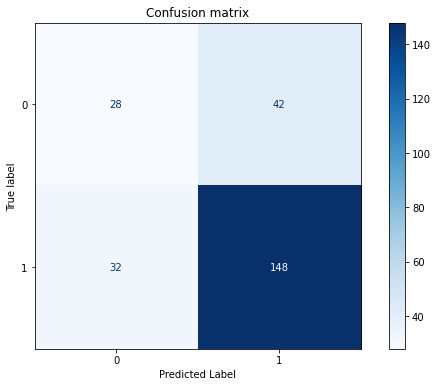

In [22]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(nclf, X_test, y_test)

### Using DecisionTreeClassifier model
#### Accuracy:

In [23]:
# get the classifier 
dclf = DecisionTreeClassifier()

# print accuracy
print_accuracy(dclf, X_train, X_test, y_train, y_test)

accuracy of the model is: 72.40 %


#### Confusion matrix:

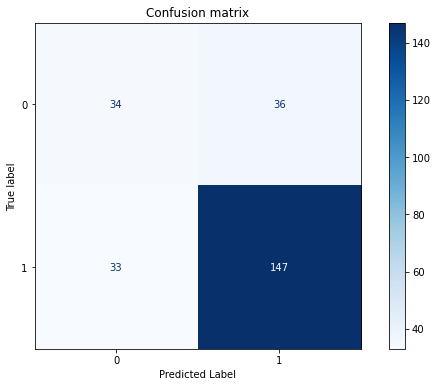

In [24]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(dclf, X_test, y_test)

### Using LogisticRegression classifier model
#### Accuracy:

In [25]:
# get the classifier 
lclf = LogisticRegression()

# print accuracy
print_accuracy(lclf, X_train, X_test, y_train, y_test)

accuracy of the model is: 77.60 %


#### Confusion matrix:

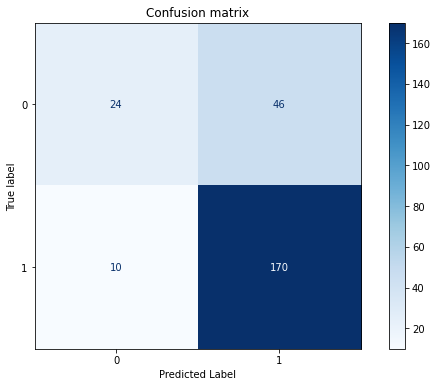

In [26]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(lclf, X_test, y_test)

## ROC curve:
### **What is ROC curve?**

The **ROC curve** summarizes the prediction performance of a classification model at all classification thresholds. Particularly, the ROC curve plots the **False Positive Rate (FPR)** on the *X-axis* and the **True Positive Rate (TPR)** on the *Y-axis*.

$\text{TPR (Sensitivity)} = \frac{TP}{TP + FN}$

$\text{FPR (1 - Specificity)} = \frac{FP}{TN + FP}$

### **Prediction probabilities**

In [27]:
# Random (chance) Prediction in the ROC plot (the middle straight line)
r_probs = [0 for _ in range(len(y_test))]

# probabilities for KNeighborsClassifier
nclf_probs = nclf.predict_proba(X_test)

# probabilities for DecisionTreeClassifier
dclf_probs = dclf.predict_proba(X_test)

# probabilities for LogisticRegression
lclf_probs = lclf.predict_proba(X_test)

# for each probabilities for a classifier data change from nested list to one list
nclf_probs = nclf_probs[:, 1]
dclf_probs = dclf_probs[:, 1]
lclf_probs = lclf_probs[:, 1]

# ROC is the receiver operating characteristic AUROC is the area under the ROC curve
# get accuracy for each classifier from the test data and the probabilities data
r_auc = roc_auc_score(y_test, r_probs)
nclf_auc = roc_auc_score(y_test, nclf_probs)
dclf_auc = roc_auc_score(y_test, dclf_probs)
lclf_auc = roc_auc_score(y_test, lclf_probs)

# print to see the AUROC for each classifier
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('KNeighborsClassifier: AUROC = %.3f' % (nclf_auc))
print('DecisionTreeClassifier: AUROC = %.3f' % (dclf_auc))
print('LogisticRegression: AUROC = %.3f' % (lclf_auc))

Random (chance) Prediction: AUROC = 0.500
KNeighborsClassifier: AUROC = 0.644
DecisionTreeClassifier: AUROC = 0.690
LogisticRegression: AUROC = 0.775


In [28]:
# Calculate ROC curve
# tpr = TP/(TP+FN) (Sensitivity)
# fpr = FP/(TN+FP) (1 - Specificity)
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
nclf_fpr, nclf_tpr, _ = roc_curve(y_test, nclf_probs)
dclf_fpr, dclf_tpr, _ = roc_curve(y_test, dclf_probs)
lclf_fpr, lclf_tpr, _ = roc_curve(y_test, lclf_probs)

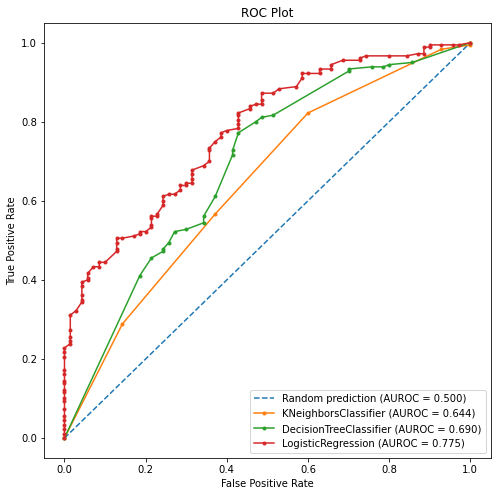

In [29]:
# set the size of the figure
plt.figure(figsize=(8,8))

# for each classifier plot the ROC curve
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(nclf_fpr, nclf_tpr, marker='.', label='KNeighborsClassifier (AUROC = %0.3f)' % nclf_auc)
plt.plot(dclf_fpr, dclf_tpr, marker='.', label='DecisionTreeClassifier (AUROC = %0.3f)' % dclf_auc)
plt.plot(lclf_fpr, lclf_tpr, marker='.', label='LogisticRegression (AUROC = %0.3f)' % lclf_auc)

# Title
plt.title('ROC Plot')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show legend
plt.legend()

# Show plot
plt.show()

### <i>Classification Conclusion:</i> from the three classifiers algorithms - the logisitic regression have the most accuracy

# <i>Part 2 - regression:</i>

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

the dataset I'm using for the classification problem is from:
https://www.kaggle.com/usgs/earthquake-database

In [31]:
# import data:
earthquakes = pd.read_csv('data/earthquakes.csv')

In [32]:
# first five earthquakes:
earthquakes.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## <i>Dataset Features:</i>
1. Date - date of the earthquake
2. Time - time of the earthquake
3. Latitude - latitude of the earthquake
4. Longitude - longitude of the earthquake
5. Type - type of the earthquake
6. Depth - depth of the earthquake
7. Depth Error - depth error of the earthquake
8. Depth Seismic Stations - depth Seismic Stations of the earthquake (another way to express a depth of an earthquake)
9. Magnitude - earthquake magnitude
10. Magnitude Type - magnitude type can be based on any of the following: - ML: Local (Richter) magnitude - MS: surface wave magnitude
11. Magnitude Seismic Stations - magnitude seismic stations of the earthquake (another way to express a magnitude of an earthquake)
12. Azimuthal Gap
13. Horizontal Distance - horizontal distance of the earthquake
14. Horizontal Error - horizontal error of the earthquake
15. Root Mean Square - root mean square of the earthquake
16. ID - unique id for each earthquake
17. Source - 
18. Location Source
19. Magnitude Source
20. Status

# The goal of my machine learning model:

After the data preparation, I want by regression algorithm to **predict the magnitude** of an earthquake by other earthquake features data

## <i>Preparing the data:</i>

In [33]:
# First print the dataset shape
print(earthquakes.shape)

(23412, 21)


In [34]:
# First, I assuming that the date and the time of the earthquake does not affect earthquake data
# and that because the porpuse of the model is to predict the magnitude earthquake by the technical data of the earthquake
# so fisrt let's clean from the data set the date and time features:
earthquakes.drop('Date', inplace=True, axis=1)
earthquakes.drop('Time', inplace=True, axis=1)

In [35]:
# Searching for null objects in Latitude feature:
# as we can see the data of Latitude feature do not contains null objects
earthquakes['Latitude'].isna().sum()

0

In [36]:
# Searching for null objects in Longitude feature:
# as we can see the data of Longitude feature do not contains null objects
earthquakes['Longitude'].isna().sum()

0

In [37]:
# See type of values in Type feature:
print(earthquakes['Type'].unique())

# As we can see the Type features contains 4 types
print(earthquakes['Type'].value_counts())

# From counting how much types of data there is in Type feature we can see that:
# there is 23232 Earthquake
# there is only 175 Nuclear Explosion
# there is only 4 Explosion
# there is only 1 Rock Burst

['Earthquake' 'Nuclear Explosion' 'Explosion' 'Rock Burst']
Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64


In [38]:
# Because Earthquake is the most common value in the Type feature,
# and the other values are minimal and have less then 1% from the Type data:
# I assuming that all the Type data of Type feature is only Earthquake and that why i delete this feature from the dataset:
earthquakes.drop('Type', inplace=True, axis=1)

In [39]:
# Searching for null objects in Depth feature:
# as we can see the data of Depth feature do not contains null objects
earthquakes['Depth'].isna().sum()

0

In [40]:
# Searching for null objects in Depth Error feature:
earthquakes['Depth Error'].isna().sum()

18951

In [41]:
# As we can see in Depth Error feature we have 18951 null objects from 23232 rows
# I assuming that the data of Depth Error is critical,
# and that wy I remain the feature but change each Null object to value of 0
earthquakes['Depth Error'].fillna(0, inplace=True)

In [42]:
# Searching for null objects in Depth Seismic Stations feature:
earthquakes['Depth Seismic Stations'].isna().sum()

16315

In [43]:
# As we can see in Depth Error feature we have 16315 null objects from 23232 rows
# I assuming that the data of Depth Seismic Stations is critical,
# and that wy I remain the feature but change each Null object to value of 0
earthquakes['Depth Seismic Stations'].fillna(0, inplace=True)

In [44]:
# Searching for null objects in Magnitude feature:
# as we can see the data of Depth feature do not contains null objects
earthquakes['Magnitude'].isna().sum()

0

In [45]:
# Searching for null objects in Magnitude feature:
earthquakes['Magnitude Type'].isna().sum()

3

In [46]:
# See type of values in Magnitude Type feature:
print(earthquakes['Magnitude Type'].unique())

# As we can see the Magnitude Type features contains 10 types
print(earthquakes['Magnitude Type'].value_counts())

['MW' 'ML' 'MH' 'MS' 'MB' 'MWC' 'MD' nan 'MWB' 'MWW' 'MWR']
MW     7722
MWC    5669
MB     3761
MWB    2458
MWW    1983
MS     1702
ML       77
MWR      26
MD        6
MH        5
Name: Magnitude Type, dtype: int64


In [47]:
# check if there a connection between Magnitude Type to Magnitude features:
earthquakes.groupby('Magnitude Type').mean()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
Magnitude Type,,,,,,,,,,,,
MB,3.536511,58.882509,81.579365,0.936134,24.343526,5.682957,0.064515,65.461718,59.799810,2.446970,6.954286,0.989051
MD,45.023194,-122.511639,21.670000,1.026667,101.333333,5.966667,0.040000,2.500000,83.666667,0.107498,0.509833,0.198333
MH,37.576500,-121.740900,8.074600,2.402000,36.600000,6.540000,NaN,0.000000,237.500000,0.443102,0.756667,0.113800
ML,39.231389,-119.764454,14.158273,8.594987,29.077922,5.814675,0.199750,12.826087,164.814571,0.514458,24.961864,0.463379
MS,0.398422,36.233651,30.142226,0.319624,3.252644,5.994360,NaN,12.567663,39.894118,NaN,0.366667,1.105132
MW,3.282243,38.656543,77.034037,0.793447,0.392515,5.933794,0.288000,2.804878,150.716279,0.510877,1.435667,1.088288
MWB,0.108245,35.876112,76.989829,1.073637,211.888934,5.907282,0.059476,33.470199,43.169508,6.865027,8.593396,0.984419
MWC,-0.880013,33.406893,66.808213,0.945916,174.656730,5.858176,NaN,9.400000,44.682402,8.727652,8.554000,1.012103
MWR,-0.263177,-4.895242,22.445385,1.903846,142.615385,5.630769,0.063714,31.166667,64.396000,1.054385,4.872727,0.938182


In [48]:
# as we can see the mean of Magnitude feature groupby Magnitude Types have no influence to each other,
# and because the purpose of the model is to predict the Magnitude value, the type is not helping me,
# and that why I decided to remove Magnitude Type feature
earthquakes.drop('Magnitude Type', inplace=True, axis=1)

In [49]:
# Searching for null objects in Magnitude feature:
earthquakes['Magnitude Error'].isna().sum()

23085

In [50]:
# as we can see there is 23085 null objects in Magnitude Error feature from 23232 rows,
# so this leave us with 23232 - 23085 = 147 not null objcets,
# this data is so minimal and tiny that I decided to remove Magnitude Error feature
earthquakes.drop('Magnitude Error', inplace=True, axis=1)

In [51]:
# Searching for null objects in Magnitude Seismic Stations feature:
earthquakes['Magnitude Seismic Stations'].isna().sum()

20848

In [52]:
# as we can see there is 20848 null objects in Magnitude Seismic Stations feature from 23232 rows,
# so this leave us with 23232 - 20848 = 2384 not null objcets,
# this data is so minimal and tiny that I decided to remove  Magnitude Seismic Stations feature
earthquakes.drop('Magnitude Seismic Stations', inplace=True, axis=1)

In [53]:
# Searching for null objects in Azimuthal Gap feature:
earthquakes['Azimuthal Gap'].isna().sum()

16113

In [54]:
# As we can see in Azimuthal Gap feature we have 16113 null objects from 23232 rows
# I assuming that the data of Azimuthal Gap is critical,
# and that wy I remain the feature but change each Null object to value of 0
earthquakes['Azimuthal Gap'].fillna(0, inplace=True)

In [55]:
# Searching for null objects in Horizontal Distance feature:
earthquakes['Horizontal Distance'].isna().sum()

21808

In [56]:
# As we can see in Horizontal Distance feature we have 21808 null objects from 23232 rows
# I assuming that the data of Horizontal Distance is critical,
# and that wy I remain the feature but change each Null object to value of 0
earthquakes['Horizontal Distance'].fillna(0, inplace=True)

In [57]:
# Searching for null objects in Horizontal Error feature:
earthquakes['Horizontal Error'].isna().sum()

22256

In [58]:
# as we can see there is 22256 null objects in Horizontal Error feature from 23232 rows,
# so this leave us with 23232 - 22256 = 976 not null objcets,
# this data is so minimal and tiny that I decided to remove Horizontal Error feature
earthquakes.drop('Horizontal Error', inplace=True, axis=1)

In [59]:
# Searching for null objects in Root Mean Square feature:
earthquakes['Root Mean Square'].isna().sum()

6060

In [60]:
# As we can see in Root Mean Square feature we have 6060 null objects from 23232 rows
# I assuming that the data of Root Mean Square is critical,
# and that wy I remain the feature but change each Null object to value of 0
earthquakes['Root Mean Square'].fillna(0, inplace=True)

In [61]:
# Assumming ID feature is useless for the prediction I decided to remove him:
earthquakes.drop('ID', inplace=True, axis=1)

In [62]:
# Checking values of Source, Location Source and Magnitude Source features
# from my personal examination I see that the Source, Location Source and Magnitude Source features values are almost the same
# and that why I decidet to delete Location Source and Magnitude Source features and only use with Source feature
earthquakes.drop('Location Source', inplace=True, axis=1)
earthquakes.drop('Magnitude Source', inplace=True, axis=1)

In [63]:
# as we can see the Source features have 13 different values
print(earthquakes['Source'].unique())

# I assume the Source feature values are critical data and that why I choose to change the data do a dummie variables
# create dummies varables for 'Source' feature:
earthquakes = pd.get_dummies(earthquakes, columns=['Source'])

['ISCGEM' 'ISCGEMSUP' 'OFFICIAL' 'CI' 'US' 'NC' 'GCMT' 'UW' 'ATLAS' 'NN'
 'SE' 'AK' 'PR']


In [64]:
# Searching for null objects in Magnitude feature:
# as we can see the data of Depth feature do not contains null objects
earthquakes['Status'].isna().sum()

0

In [65]:
# as we can see the Status features have 2 different values
print(earthquakes['Status'].unique())

# and because the Status feature have only two values, I decided to change the values to binary representation
# Automatic = 1
# Reviewed = 0
earthquakes['Status'] = earthquakes['Status'].apply(lambda x: 1 if x == 'Automatic' else 0)

['Automatic' 'Reviewed']


In [66]:
# at last after cleaning all the null objcets, check if I miss some null objcets in any of the features in the dataset
# and as we can see there no null objcets any more in our dataset
earthquakes.isna().sum()

Latitude                  0
Longitude                 0
Depth                     0
Depth Error               0
Depth Seismic Stations    0
Magnitude                 0
Azimuthal Gap             0
Horizontal Distance       0
Root Mean Square          0
Status                    0
Source_AK                 0
Source_ATLAS              0
Source_CI                 0
Source_GCMT               0
Source_ISCGEM             0
Source_ISCGEMSUP          0
Source_NC                 0
Source_NN                 0
Source_OFFICIAL           0
Source_PR                 0
Source_SE                 0
Source_US                 0
Source_UW                 0
dtype: int64

In [67]:
# Also we can see that all our data is float or int data types
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Latitude                23412 non-null  float64
 1   Longitude               23412 non-null  float64
 2   Depth                   23412 non-null  float64
 3   Depth Error             23412 non-null  float64
 4   Depth Seismic Stations  23412 non-null  float64
 5   Magnitude               23412 non-null  float64
 6   Azimuthal Gap           23412 non-null  float64
 7   Horizontal Distance     23412 non-null  float64
 8   Root Mean Square        23412 non-null  float64
 9   Status                  23412 non-null  int64  
 10  Source_AK               23412 non-null  uint8  
 11  Source_ATLAS            23412 non-null  uint8  
 12  Source_CI               23412 non-null  uint8  
 13  Source_GCMT             23412 non-null  uint8  
 14  Source_ISCGEM           23412 non-null

In [68]:
earthquakes.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Azimuthal Gap,Horizontal Distance,Root Mean Square,Status,...,Source_GCMT,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_NN,Source_OFFICIAL,Source_PR,Source_SE,Source_US,Source_UW
count,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,...,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000
mean,1.679033,39.639961,70.767911,0.951405,83.472535,5.882531,13.768564,0.273545,0.758045,0.112720,...,0.002349,0.105074,0.005126,0.002178,0.000171,0.000342,0.000043,0.000043,0.881172,0.000256
std,30.113183,125.511959,122.651898,2.893677,154.877281,0.423066,27.213184,1.731258,0.476487,0.316257,...,0.048413,0.306656,0.071411,0.046623,0.013070,0.018483,0.006536,0.006536,0.323593,0.016007
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-18.653000,-76.349750,14.522500,0.000000,0.000000,5.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-3.568500,103.982000,33.000000,0.000000,0.000000,5.700000,0.000000,0.000000,0.930000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,26.190750,145.026250,54.000000,0.000000,115.000000,6.000000,22.000000,0.000000,1.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,360.000000,37.874000,3.440000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
# dataset prepared to the model
earthquakes

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Azimuthal Gap,Horizontal Distance,Root Mean Square,Status,...,Source_GCMT,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_NN,Source_OFFICIAL,Source_PR,Source_SE,Source_US,Source_UW
0,19.2460,145.6160,131.60,0.0,0.0,6.0,0.00,0.000,0.0000,1,...,0,1,0,0,0,0,0,0,0,0
1,1.8630,127.3520,80.00,0.0,0.0,5.8,0.00,0.000,0.0000,1,...,0,1,0,0,0,0,0,0,0,0
2,-20.5790,-173.9720,20.00,0.0,0.0,6.2,0.00,0.000,0.0000,1,...,0,1,0,0,0,0,0,0,0,0
3,-59.0760,-23.5570,15.00,0.0,0.0,5.8,0.00,0.000,0.0000,1,...,0,1,0,0,0,0,0,0,0,0
4,11.9380,126.4270,15.00,0.0,0.0,5.8,0.00,0.000,0.0000,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,38.3917,-118.8941,12.30,1.2,40.0,5.6,42.47,0.120,0.1898,0,...,0,0,0,0,1,0,0,0,0,0
23408,38.3777,-118.8957,8.80,2.0,33.0,5.5,48.58,0.129,0.2187,0,...,0,0,0,0,1,0,0,0,0,0
23409,36.9179,140.4262,10.00,1.8,0.0,5.9,91.00,0.992,1.5200,0,...,0,0,0,0,0,0,0,0,1,0
23410,-9.0283,118.6639,79.00,1.8,0.0,6.3,26.00,3.553,1.4300,0,...,0,0,0,0,0,0,0,0,1,0


### Separate data to training and testing sets

In [70]:
feature_cols = ['Latitude','Longitude','Depth','Depth Error','Depth Seismic Stations','Azimuthal Gap','Horizontal Distance',
                'Root Mean Square','Status','Source_AK','Source_ATLAS','Source_CI','Source_GCMT','Source_ISCGEM',
                'Source_ISCGEMSUP','Source_NC','Source_NN','Source_OFFICIAL','Source_PR','Source_SE','Source_US',
                'Source_UW']
X = earthquakes[feature_cols]
y = earthquakes['Magnitude']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

### Using LinearRegression model

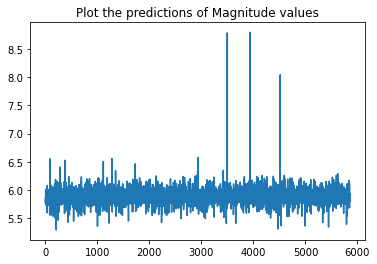

In [71]:
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred  = regr.predict(X_test)

# show a plot of the predictions of the Magnitude
plt.plot(y_pred)
plt.title("Plot the predictions of Magnitude values")
plt.show()

In [72]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3010819947175515
Mean Squared Error: 0.16897941849460127
Root Mean Squared Error: 0.41107106258480575


In [73]:
# print with a data frame the actual and predicted values of the y dataset (testing set)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
5439,5.6,5.783353
4493,5.6,5.785221
9261,5.5,5.820779
8156,5.7,5.866242
5494,5.5,5.767575
...,...,...
11231,5.7,5.901713
7945,5.6,5.851909
16686,5.6,5.821290
19759,5.8,5.940422


### <i>Plot Linear Regression:</i>

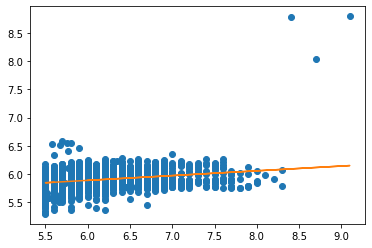

In [74]:
# ploting the predicted data with points
plt.plot(y_test, y_pred, 'o')

# get m and b using numpy
# m = slope
# b = intercept
m, b = np.polyfit(y_test, y_pred, 1)

# ploting line
plt.plot(y_test, m*y_test + b)

# show plot
plt.show()